In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline 






In [5]:
df=pd.read_csv('time_series_2019-ncov-Confirmed.csv')

In [6]:
df.head(5)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [8]:
df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,16.907598,20.383984,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,224.934544,266.700712,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 65 columns):
Province/State    325 non-null object
Country/Region    487 non-null object
Lat               487 non-null object
Long              487 non-null object
1/22/20           487 non-null int64
1/23/20           487 non-null int64
1/24/20           487 non-null int64
1/25/20           487 non-null int64
1/26/20           487 non-null int64
1/27/20           487 non-null int64
1/28/20           487 non-null int64
1/29/20           487 non-null int64
1/30/20           487 non-null int64
1/31/20           487 non-null int64
02-01-2020        487 non-null int64
02-02-2020        487 non-null int64
02-03-2020        487 non-null int64
02-04-2020        487 non-null int64
02-05-2020        487 non-null int64
02-06-2020        487 non-null int64
02-07-2020        487 non-null int64
02-08-2020        487 non-null int64
02-09-2020        487 non-null int64
02-10-2020        487 non-null int64
02-

In [16]:
df.shape

(487, 65)

In [17]:
df = df.drop(['Province/State','Lat','Long'],axis=1)

In [18]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,75,82,114,147,177,212,272,322,411,599
1,Japan,2,1,2,2,4,4,7,7,11,...,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,0,1,3,3,4,5,7,7,10,...,200,212,226,243,266,313,345,385,432,455
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,Malaysia,0,0,0,3,4,4,4,7,8,...,197,238,428,566,673,790,900,1030,1183,1306
5,Canada,0,0,0,0,0,0,1,1,1,...,64,64,73,103,103,186,231,271,424,424
6,Australia,0,0,0,0,3,4,4,4,4,...,92,112,134,171,210,267,307,353,436,533
7,Australia,0,0,0,0,1,1,1,1,2,...,36,49,57,71,94,121,121,121,229,296
8,Australia,0,0,0,0,0,0,0,1,3,...,35,46,61,68,78,94,144,184,221,221
9,Cambodia,0,0,0,0,0,1,1,1,1,...,5,7,7,7,33,35,37,51,53,84


In [27]:

data =df.keys()
data =data[1:]

In [28]:
data

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '02-01-2020', '02-02-2020',
       '02-03-2020', '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020',
       '02-08-2020', '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020',
       '03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020',
       '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020',
       '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [32]:
for i in data:
    count=0
    for row in range(487):
        if(df[i][row]==0):
            count+=1
    per=count/487
    if(per>0.71):
        df = df.drop([i],axis=1)

In [33]:
c=df.groupby('Country/Region').sum()
c= c.reset_index()

In [34]:
c.shape

(171, 21)

In [35]:
x_val=c.keys()
x_val = x_val[1:]
x_val

Index(['03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [36]:
y_val=[]
for i in x_val:
    y_val.append(df[i].sum())
print(y_val)

[92840, 95120, 97882, 101784, 105821, 109795, 113561, 118592, 125865, 128343, 145193, 156094, 167446, 181527, 197142, 214910, 242708, 272166, 304524, 335955]


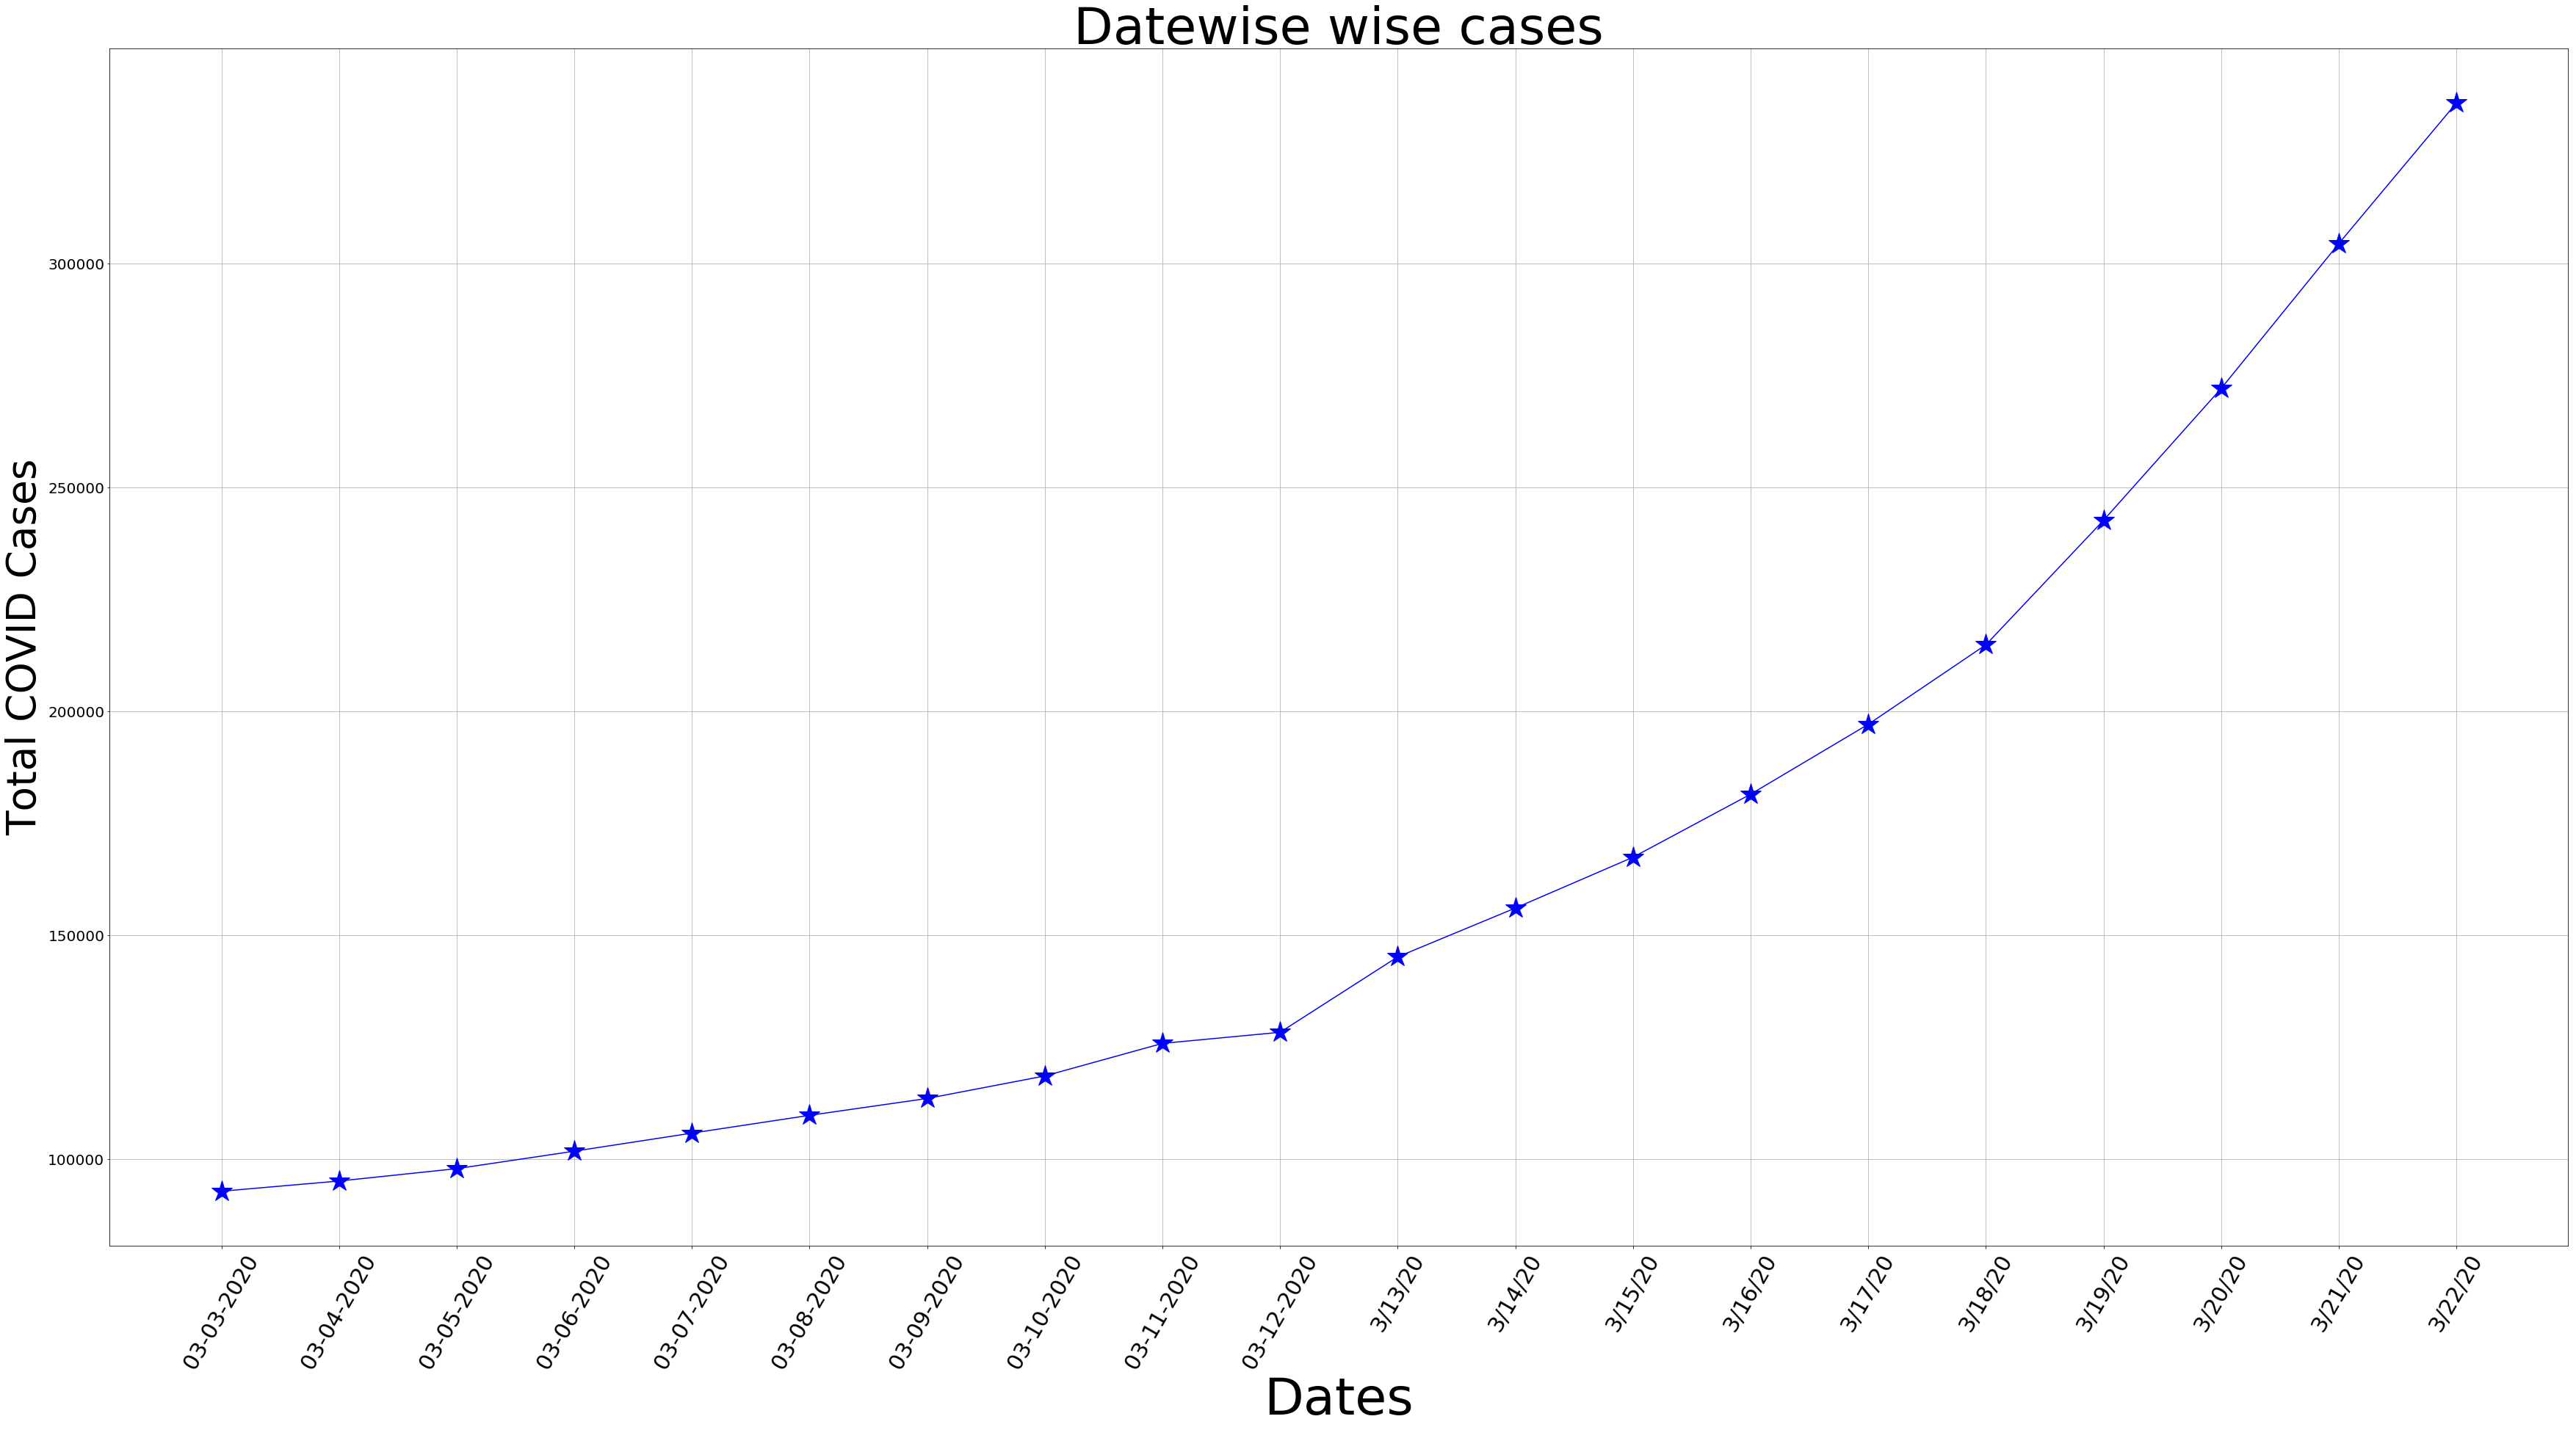

In [37]:
plt.figure(figsize=(60,30))
ax=plt.subplot(1,1,1)
x=range(len(x_val))
y=y_val
# ax.set_yticks(y_val)
plt.yticks(fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_val, rotation=60, fontsize=30)
plt.plot(x,y, marker='*',c='blue', markersize=30)
plt.title('Datewise wise cases',fontsize=70)
plt.xlabel('Dates',fontsize=70)
plt.ylabel('Total COVID Cases',fontsize=55)
plt.grid()
plt.show()